In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from autots import AutoTS  # 827 star
from autots.evaluator.anomaly_detector import AnomalyDetector, HolidayDetector
from autots.datasets import load_live_daily
#from autots.datasets import load_linear

from autots.datasets import load_hourly


from sktime.forecasting.model_selection import temporal_train_test_split
#一般异常检测
from pyod.models.knn import KNN  #7.4k star  A Comprehensive and Scalable Python Library for Outlier Detection (Anomaly Detection) For time-series outlier detection, please use TODS
from pyod.models.iforest import IForest

from adtk.detector import SeasonalAD  #963 star  无监督异常检测
#时间序列异常检测
from pmdarima.arima import auto_arima  #1.4k star  时间序列预测
from pmdarima.datasets import load_wineind
#from stumpy import stump

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
#数据加载
# # internet connection required to load this df
# wiki_pages = [
#  "Standard_deviation",
#  "Christmas",
#  "Thanksgiving",
#  "all",
# ]
# df = load_live_daily(
#  long=False,
#  fred_series=None,
#  tickers=None,
#  trends_list=None,
#  earthquake_min_magnitude=None,
#  weather_stations=None,
#  london_air_stations=None,
#  gov_domain_list=None,
#  weather_event_types=None,
#  wikipedia_pages=wiki_pages,
#  sleep_seconds=5,
# )
# df.to_csv('load_live_daily.csv')

df_load_live_daily = pd.read_csv('load_live_daily.csv', header=0) #autots的load_live_daily函数的数据集，避免频繁下载保存在本地

autots_datasets=['load_daily',#target
    #'load_live_daily',#online
    'load_monthly',
    #'load_yearly',
    'load_hourly',#target
    #'load_weekly',
    #'load_weekdays',
    #'load_zeroes',
    'load_linear',
    'load_sine',
    'load_artificial'
]

from autots.datasets import load_daily
from autots.datasets import load_monthly
from autots.datasets import load_hourly
from autots.datasets import load_linear
from autots.datasets import load_sine
from autots.datasets import load_artificial

df_load_daily = load_daily()
print(str(df_load_daily.head(10))+'\n')
print(str(df_load_daily.count())+'\n')
print(str(df_load_daily.dtypes)+'\n')
#print(str(df_load_daily.describe())+'\n')
series_id_count = df_load_daily.loc[:, 'series_id'].nunique()
print(str(series_id_count)+'\n')

#     datetime           series_id     value
# 0 2017-01-01  wiki_United_States  114051.0
# 1 2017-01-02  wiki_United_States   41916.0

#df = load_monthly()
#print(str(df.head(10))+'\n')
#     datetime  value series_id                              series_name
# 0 1953-04-01   2.83      GS10  10-Year Treasury Constant Maturity Rate
# 1 1953-05-01   3.05      GS10  10-Year Treasury Constant Maturity Rate

df_load_hourly = load_hourly()
print(str(df_load_hourly.head(10))+'\n')
print(str(df_load_hourly.count())+'\n')
print(str(df_load_hourly.dtypes)+'\n')
#print(str(df_load_hourly.describe())+'\n')
series_id_count = df_load_hourly.loc[:, 'series_id'].nunique()
print(str(series_id_count)+'\n')

#              datetime   series_id value
# 0 2016-10-01 00:00:00  clouds_all  20.0
# 1 2016-10-01 01:00:00  clouds_all  20.0


df = load_linear()
#print(str(df.head(10))+'\n')
#               0     1     2     3     4
# 2021-01-01  0.0   1.0   2.0   3.0   4.0
# 2021-01-02  0.0   2.0   4.0   6.0   8.0


df = load_sine()
#print(str(df.head(10))+'\n')
#               0         1         2         3         4
# 2021-01-01  0.0  0.462482  3.813054  0.025971  7.061509
# 2021-01-02  0.0  1.818765  0.119695  3.782314  6.562881


print('\n\n'+'----------------------------------------')
#df = load_artificial()
#print(str(df.head(10))+'\n')
#             white_noise  white_noise_trend  random_walk  arima007_trend  \
# 2021-09-11    -0.608169          -0.091281        -0.64            2.00   
# 2021-09-12    -1.247293          -1.045219         0.00            2.01   
# 2021-09-13     0.026872           0.337244         0.64            2.02   
# 2021-09-14    -0.636580           0.877046         0.00            1.63   
# 2021-09-15    -0.637570           0.681100        -0.64            1.64   
# 2021-09-16     0.395300           0.123835        -0.64            0.85   
# 2021-09-17     0.971297           0.427159        -0.64            1.26   
# 2021-09-18    -0.572402           3.002556        -1.28            0.47   
# 2021-09-19    -0.031739           0.438572        -0.64            0.08   
# 2021-09-20    -0.586998           1.165633        -1.28            0.09   

#             arima017  arima200_gamma  arima220_outliers  linear  sine_wave  \
# 2021-09-11 -0.066667        0.293528          -0.062918   0.000   0.000000   
# 2021-09-12 -0.066667        0.384978           1.203648   0.025   0.841471   
# 2021-09-13 -0.066667        0.919248           3.274850   0.050   0.909297   
# 2021-09-14 -0.066667        3.645023           4.350546   0.075   0.141120   
# 2021-09-15 -0.066667        3.785149           4.407691   0.100  -0.756802   
# 2021-09-16 -0.066667        2.349957           4.982531   0.125  -0.958924   
# 2021-09-17 -0.033333        1.129939           5.607965   0.150  -0.279415   
# 2021-09-18  0.033333        2.580826           4.867808   0.175   0.656987   
# 2021-09-19  0.066667        4.119977           3.755261   0.200   0.989358   
# 2021-09-20  0.133333        3.140111           3.819698   0.225   0.412118   

#             sine_seasonality_monthweek  ...  wavelet_morlet      lumpy  \
# 2021-09-11                    1.147061  ...    3.672968e-15   3.164042   
# 2021-09-12                    1.288658  ...   -3.843828e-15   1.081992   
# 2021-09-13                    1.637035  ...   -7.010759e-14   1.728671   
# 2021-09-14                    1.676800  ...   -2.257248e-13   3.764760   
# 2021-09-15                    1.955539  ...    5.296631e-14   4.596018   
# 2021-09-16                    1.739061  ...    3.027120e-12  11.816925   
# 2021-09-17                    1.800803  ...    1.047696e-11   4.206783   
# 2021-09-18                    2.018634  ...    3.451023e-12   1.913474   
# 2021-09-19                    2.032528  ...   -9.910891e-11   2.365324   
# 2021-09-20                    1.650328  ...   -3.691102e-10   3.046170   

#             intermittent_random  intermittent_weekly  out_of_stock  \
# 2021-09-11                    1                    0      0.000000   
# 2021-09-12                    1                    0      0.000000   
# 2021-09-13                    0                    0      0.000000   
# 2021-09-14                    0                    0      0.000000   
# 2021-09-15                    1                    1      0.000000   
# 2021-09-16                    0                    0      0.000000   
# 2021-09-17                    0                    2      0.000000   
# 2021-09-18                    0                    0      0.000000   
# 2021-09-19                    0                    0      5.062876   
# 2021-09-20                    0                    1      4.344729   

#             cubic_root  logistic_growth  recent_spike  recent_plateau  \
# 2021-09-11   -7.113787         0.693147      0.006927       -0.012130   
# 2021-09-12   -7.107194         1.098612      0.012719        0.012370   
# 2021-09-13   -7.100588         1.386294      0.163301        0.003095   
# 2021-09-14   -7.093971         1.609438      0.084808        0.025942   
# 2021-09-15   -7.087341         1.791759      0.034067        0.063986   
# 2021-09-16   -7.080699         1.945910      0.090341        0.072229   
# 2021-09-17   -7.074044         2.079442      0.104927        0.061390   
# 2021-09-18   -7.067377         2.197225      0.083299       -0.045969   
# 2021-09-19   -7.060697         2.302585      0.113109        0.013489   
# 2021-09-20   -7.054004         2.397895      0.042601        0.079093   

#             old_to_new  
# 2021-09-11    1.000592  
# 2021-09-12    1.017172  
# 2021-09-13    1.032149  
# 2021-09-14    1.047358  
# 2021-09-15    1.068279  
# 2021-09-16    1.098612  
# 2021-09-17    1.128223  
# 2021-09-18    1.130102  
# 2021-09-19    1.088558  
# 2021-09-20    1.048065  

    datetime           series_id     value
0 2017-01-01  wiki_United_States  114051.0
1 2017-01-02  wiki_United_States   41916.0
2 2017-01-03  wiki_United_States   45976.0
3 2017-01-04  wiki_United_States   44760.0
4 2017-01-05  wiki_United_States   44223.0
5 2017-01-06  wiki_United_States   44649.0
6 2017-01-07  wiki_United_States   40068.0
7 2017-01-08  wiki_United_States   41823.0
8 2017-01-09  wiki_United_States   51655.0
9 2017-01-10  wiki_United_States   50912.0

datetime     50169
series_id    50169
value        50169
dtype: int64

datetime     datetime64[ns]
series_id            object
value               float64
dtype: object

21

             datetime   series_id value
0 2016-10-01 00:00:00  clouds_all  20.0
1 2016-10-01 01:00:00  clouds_all  20.0
2 2016-10-01 02:00:00  clouds_all  56.0
3 2016-10-01 03:00:00  clouds_all  56.0
4 2016-10-01 04:00:00  clouds_all  56.0
5 2016-10-01 05:00:00  clouds_all  24.0
6 2016-10-01 06:00:00  clouds_all  24.0
7 2016-10-01 07:00:00  clouds_al

In [4]:
#个性化的数据预处理
df_load_daily['datetime'] = pd.to_datetime(df_load_daily['datetime'],format='%Y-%m-%d %H:%M:%S')
df_load_daily = df_load_daily.set_index('datetime')
df_load_daily = df_load_daily.pivot(columns='series_id', values='value')



df_load_hourly['datetime'] = pd.to_datetime(df_load_hourly['datetime'],format='%Y-%m-%d %H:%M:%S')
df_load_hourly = df_load_hourly.set_index('datetime')
df_load_hourly = df_load_hourly.pivot(columns='series_id', values='value')
df_load_hourly.drop(columns='weather_main',inplace=True)
df_load_hourly.drop(columns='snow_1h',inplace=True)
df_load_hourly.drop(columns='rain_1h',inplace=True)
df_load_hourly=df_load_hourly.select_dtypes(include=['object']).astype(float)##

df_load_hourly.drop(columns='clouds_all',inplace=True)
df_load_hourly.drop(columns='traffic_volume',inplace=True)

df_load_live_daily['date'] = pd.to_datetime(df_load_live_daily['date'],format='%Y-%m-%d')
df_load_live_daily = df_load_live_daily.set_index('date')

/Users/edmundzhang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.13309e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


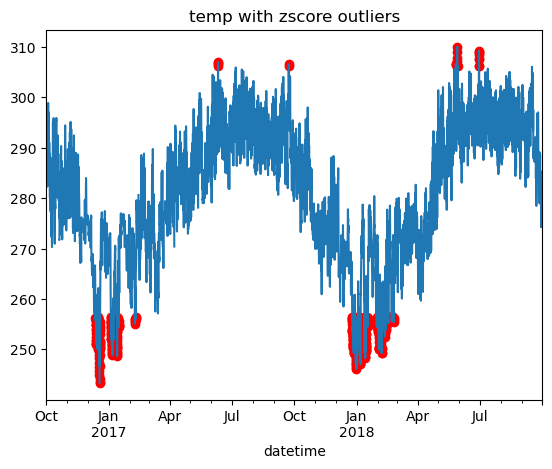

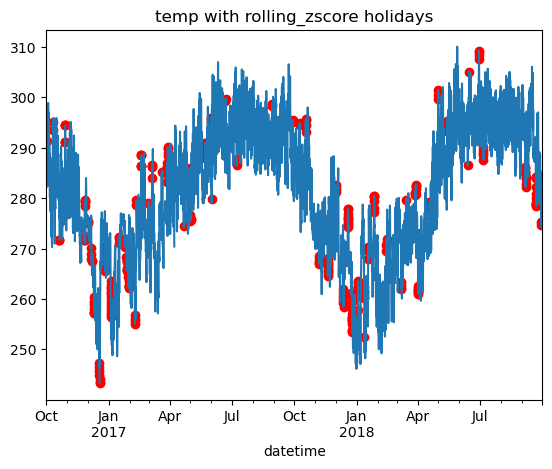

In [54]:
#df_datasets = [df_load_live_daily, df_load_daily, df_load_hourly]
# df_datasets              = [df_load_live_daily,df_load_hourly]
# df_datasets_timeinterval = ['D','H']

df_datasets              = [df_load_hourly]
df_datasets_timeinterval = ['H']

""" AnomalyDetector:
Detect anomalies on a historic dataset.
Note anomaly score patterns vary by method.
Anomaly flag is standard -1 = anomaly; 1 = regular"""
        
for df_dataset in df_datasets:
    params = AnomalyDetector.get_new_params()
    mod = AnomalyDetector(output='multivariate', **params)
    mod.detect(df_dataset)
    for col_name in df_dataset.columns:
        mod.plot(series_name=col_name)
    #print(mod.scores) # meaning of scores varies by method


"""HolidayDetector:
Detect anomalies, then mark as holidays (events, festivals, etc) any that reoccur to a calendar.

Be aware of timezone, especially combining series from multiple time zones. Dates then may not accurately align.
Can pick up a holiday on the wrong calendar especially for extended holidays (Christmas) and with short (several years is short here) history.
Holidays on unusual days or weekdays of month (5th Monday of April) may occur
No multiyear patterns (election year) are detected - would need lots of history
"""

for index,df_dataset in enumerate(df_datasets):
    # holiday detection, random parameters
    holiday_params = HolidayDetector.get_new_params()
    mod = HolidayDetector(**holiday_params)
    mod.detect(df_dataset)
    # several outputs are possible, you'll need to subset results from multivariate inputs
    full_dates = pd.date_range("2014-01-01", "2024-01-01", freq=df_datasets_timeinterval[index])
    prophet_holidays = mod.dates_to_holidays(full_dates, style="prophet")
    for col_name in df_dataset.columns:
        mod.plot(series_name=col_name)
    #print(mod.scores) # meaning of scores varies by method


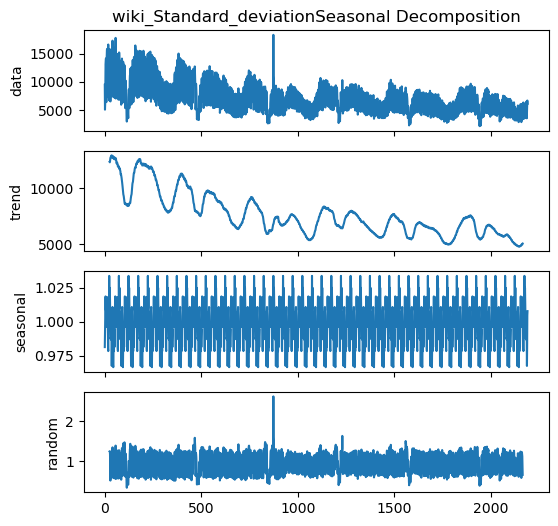

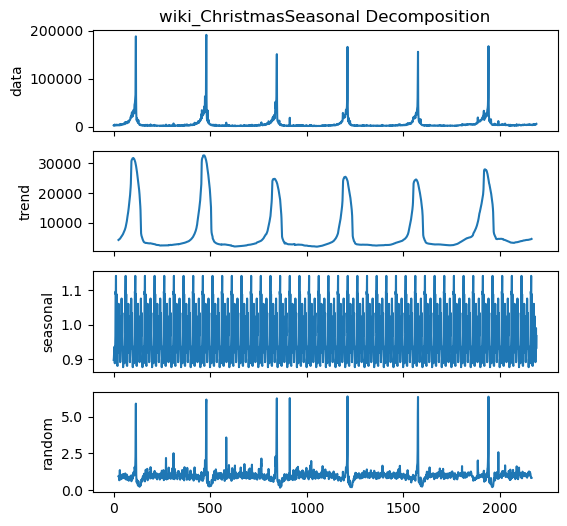

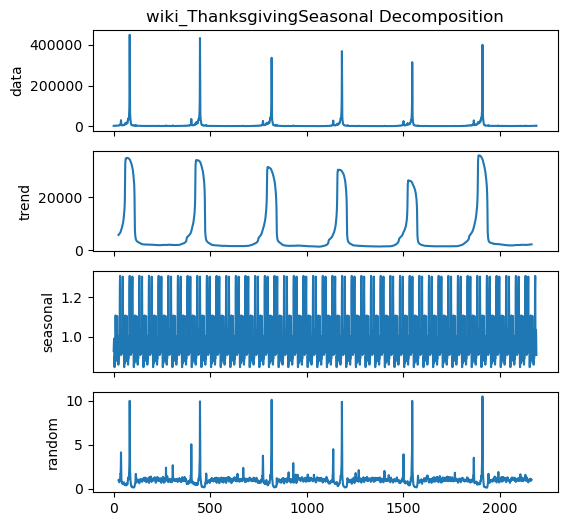

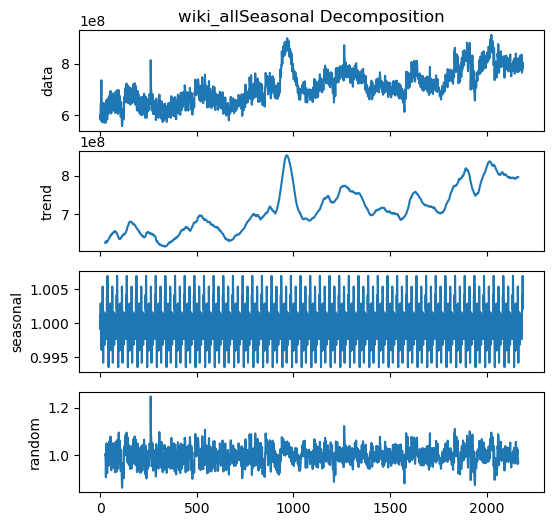

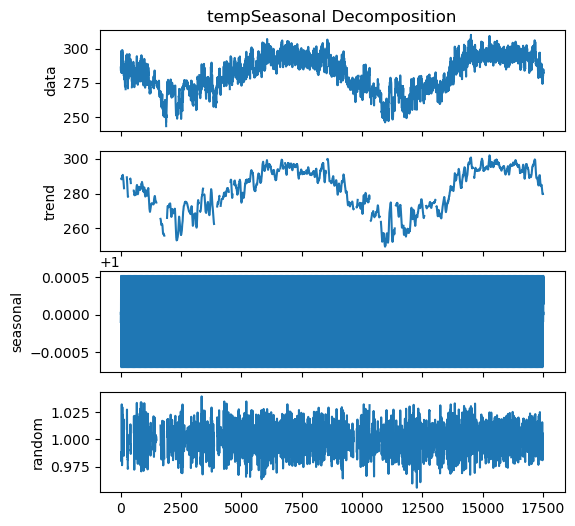

In [64]:
from pmdarima import arima
from pmdarima import datasets
from pmdarima import utils

df_datasets              = [df_load_live_daily,df_load_hourly]
#df_datasets              = [df_load_hourly]

for index,df_dataset in enumerate(df_datasets):
    #figure_kwargs = {'figsize': (6, 6)}  # set figure size for both examples
    
    for col_name in df_dataset.columns:
        df_dataset_col_np = df_dataset[col_name].to_numpy()
        #decomposed = arima.decompose(x=df_dataset_np,type_='additive', m=50)
        decomposed = arima.decompose(x=df_dataset_col_np,type_='multiplicative', m=50)
        axes = utils.decomposed_plot(decomposed, figure_kwargs=figure_kwargs,show=False)
        axes[0].set_title(col_name+" Seasonal Decomposition")

In [ ]:
import pmdarima as pm
from pmdarima import arima
from pmdarima import model_selection
from pmdarima import datasets
from pmdarima import utils
import numpy as np
from matplotlib import pyplot as plt


df_load_hourly = df_load_hourly.dropna()
#df_datasets              = [df_load_live_daily,df_load_hourly]
df_datasets              = [df_load_hourly]

for index,df_dataset in enumerate(df_datasets):
    #figure_kwargs = {'figsize': (6, 6)}  # set figure size for both examples
    for col_name in df_dataset.columns:
        df_dataset_col_np = df_dataset[col_name].to_numpy()
        
        #decomposed = arima.decompose(x=df_dataset_col_np,type_='multiplicative', m=50)
        #axes = utils.decomposed_plot(decomposed, figure_kwargs=figure_kwargs,show=False)
        #axes[0].set_title(col_name+" Seasonal Decomposition")
        arima = pm.auto_arima(df_dataset_col_np, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=1,
                      seasonal=True, m=12,n_jobs=-1)
        x = np.arange(df_dataset_col_np.shape[0])
        y = arima.predict_in_sample(n_periods=df_dataset_col_np.shape[0])
        plt.plot(x,data)
        plt.scatter(x, y, marker='*')
        plt.title('Actual test samples vs. forecasts')
        plt.show()

/Users/edmundzhang/anaconda3/lib/python3.11/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=40065.156, Time=4.58 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=51738.752, Time=0.33 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=41914.782, Time=2.00 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=44785.132, Time=2.61 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=51736.753, Time=0.27 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=41568.155, Time=4.61 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=41719.290, Time=3.19 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=39288.872, Time=10.95 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=39852.801, Time=11.80 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=38412.603, Time=12.94 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=39412.805, Time=14.31 sec
 ARIMA(1,1,2)(2,0,2)[12] intercept   : AIC=38458.486, Time=11.54 sec
 ARIMA(2,1,1)(2,0,2)[12] intercept   : AIC=38490.774, Time=12.15 sec
 ARIMA(3,1,2)(2,0,2)[12] intercept   : AIC=38415.597, Time=14.43 se

/Users/edmundzhang/anaconda3/lib/python3.11/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=3071.797, Time=0.37 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3131.408, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3097.884, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3066.329, Time=0.13 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=3089.456, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=3067.473, Time=0.20 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=3067.481, Time=0.43 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=3071.631, Time=0.14 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=3069.408, Time=0.30 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=3121.532, Time=0.07 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=3072.588, Time=0.13 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=3065.534, Time=0.11 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=3087.893, Time=0.04 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=3070.570, Time=0.10 sec
 ARIMA(0,1,2)(0,1,2

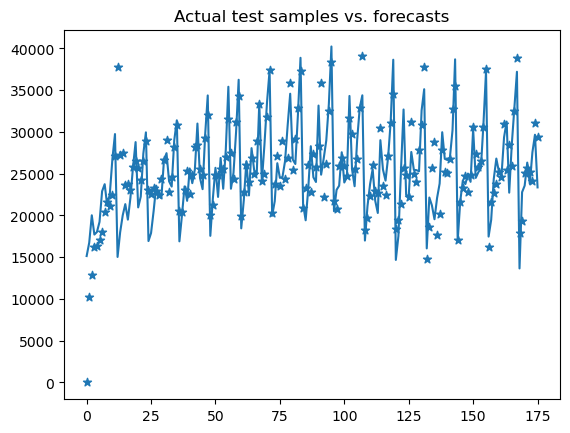

In [66]:
import pmdarima as pm
from pmdarima import arima
from pmdarima import model_selection
from pmdarima import datasets
from pmdarima import utils
import numpy as np
from matplotlib import pyplot as plt
# #############################################################################
# Load the data and split it into separate pieces
data = pm.datasets.load_wineind()
# Fit a simple auto_arima model
arima = pm.auto_arima(data, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=True, m=12,n_jobs=-1)

# #############################################################################
# Plot actual test vs. forecasts:
x = np.arange(data.shape[0])
y = arima.predict_in_sample(n_periods=data.shape[0])

plt.plot(x,data)
plt.scatter(x, y, marker='*')
plt.title('Actual test samples vs. forecasts')
plt.show()

In [65]:
# from pmdarima import arima
# from pmdarima import datasets
# from pmdarima import utils

# # #############################################################################

# # So what is happening when we call `decomposed`?
# # 1) The trend is extracted from the signal via a convolution using either a
# #    SMA or a user-defined filter.
# # 2) We remove the effects of the trend from the original signal by either
# #    subtracting its effects or dividing out its effects for `additive` or
# #    'multiplicative' types of decompositions, respectively. We then take the
# #    mean across all seasons to get the values for a single season. For m=4, we
# #    expect 4 values for a single season.
# # 3) We then create the seasonal series by replicating the single season
# #    until it is the same length of the trend signal.
# # 4) Lastly to get the random/noise elements of the signal we remove the effects
# #    of both the trend and seasonal series and we are now left with the
# #    variation of the original signal that is neither explainable by seasonal
# #    nor trend effects.
# #
# # This logic produces a named tuple of the original signal, trend, seasonal,
# # and random components. It is this named tuple that is passed to
# # `decomposed_plot`

# figure_kwargs = {'figsize': (6, 6)}  # set figure size for both examples

# #
# # ADDITIVE EXAMPLE : ausbeer
# #

# # Decompose the ausbeer dataset into trend, seasonal and random parts.
# # We subset to a small window of the time series.

# #ausbeer = datasets.load_ausbeer()

# ausbeer = pm.datasets.load_wineind()

# print('ausbeer:'+str(ausbeer)+'\n')
# timeserie_beer = ausbeer[0:len(ausbeer)]

# decomposed = arima.decompose(timeserie_beer, 'additive', m=4)

# # Plot the decomposed signal of ausbeer as a subplot

# axes = utils.decomposed_plot(decomposed, figure_kwargs=figure_kwargs,show=False)
# axes[0].set_title("Ausbeer Seasonal Decomposition")